In [310]:
import matplotlib.pyplot as plt

In [397]:
class GameOfLife(object):  
    
    def __init__(self, x_dim, y_dim):
        """
        Initializes game board and grabs a few numbers for use throughout methods.
        print and draw are toggles for console vs matplotlib visual output.
        
        :param x_dim: sets number of columns in grid
        :param y_dim: sets number of rows in grid
        """
        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.no_cols = x_dim
        self.no_rows = y_dim
        self.no_steps = 0
        self.grid = [[0 for col_num in range(x_dim)] for row_num in range(y_dim)]
        # Can toggle here to control printing or drawing grid
        self.print = False
        self.draw = True
        
    def increment_steps(self):
        """
        Increments the number of steps in the game by one
        
        :return: null return
        """
        self.no_steps+=1
    
    def get_grid(self):
        """
        Returns list representing game grid for use in other methods
        
        :return: game grid as 2d list
        """
        # Implement a getter method for your grid.
        return self.grid

    def print_grid(self):
        """
        Prints the grid to the console for pared down visual output.
        1s represent alive and 2s represent not alive.
        
        :return: console output representing game grid
        """
        # Implement a method to print out your grid in a human-readable format.
        if not self.print:
            return 
        
        g = self.get_grid()
        print(f"\n\nStep {self.no_steps}")
        for row_num in reversed(g):
            print(*row_num, sep=" | ")
            print(f"{'---- ' * (self.no_cols-1)}")

    def populate_grid(self, coord):
        """
        Populates starting state of the grid. Method receives a list of tuples showing which
        cells stat the game alive and updates the game state to reflect them.
        
        :param coord: list of tuples
        :return: prints and draws grid based on toggle flags
        """
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        for pair in coord:
            x = pair[0] 
            y = pair[1]
            self.grid[x][y] = 1
            
        self.print_grid()
        self.draw_grid()
            
    def make_step(self):
        """
        Core logic of moving through the game. This represents moving one cycle forward in the game,
        checking each cell to determine its state for the next output.
        
        Logic for checking alive vs dead:
        - Living cells survive if they have 2 or 3 neighbors, and they die if they have more or less
        - Dead cells become alive if they have exactly 2 neighbors, and they remain dead if they have more or less
        
        :return: prints and draws grid based on toggle flags
        """
        # Implement the logic to update the game state according to the rules of Conway's Game of Life.
        g = self.get_grid()
        
        # We'll copy the results of turning alive or dead into a separate list before overwriting the game state
        next_state = [[None for col_num in range(self.no_cols)] for row_num in range(self.no_rows)]
        
        # This checks a grid around a cell starting directly to the left and moving clockwise.
        # This also returns 0 if the index during that 8-direction check is out of bounds for the grid size.
        for row_num in range(self.no_rows):
            for col_num in range(self.no_cols):
                no_alive_neighbors = sum([
                    g[row_num][col_num-1] if 0 <= row_num < self.no_rows and 0 <= col_num-1 < self.no_cols else 0,
                    g[row_num-1][col_num-1] if 0 <= row_num-1 < self.no_rows and 0 <= col_num-1 < self.no_cols else 0,
                    g[row_num-1][col_num] if 0 <= row_num-1 < self.no_rows and 0 <= col_num < self.no_cols else 0,
                    g[row_num-1][col_num+1] if 0 <= row_num-1 < self.no_rows and 0 <= col_num+1 < self.no_cols else 0,
                    g[row_num][col_num+1] if 0 <= row_num < self.no_rows and 0 <= col_num+1 < self.no_cols else 0,
                    g[row_num+1][col_num+1] if 0 <= row_num+1 < self.no_rows and 0 <= col_num+1 < self.no_cols else 0,
                    g[row_num+1][col_num] if 0 <= row_num+1 < self.no_rows and 0 <= col_num < self.no_cols else 0,
                    g[row_num+1][col_num-1] if 0 <= row_num+1 < self.no_rows and 0 <= col_num-1 < self.no_cols else 0
                ])

                # Logic for turning alive and not alive
                #
                # If cell is alive and has two or three live neighbors, then it survives
                #
                # If cell is not alive, then it only becomes alive if it has exactly three live neighbors
                next_state[row_num][col_num] = 1 if (
                        (g[row_num][col_num] == 1 and no_alive_neighbors in [2, 3]) 
                        or (g[row_num][col_num] == 0 and no_alive_neighbors == 3)
                ) else 0
                    
        self.grid = next_state 
        self.increment_steps()
        self.print_grid()
        self.draw_grid()

    def make_n_steps(self, n):
        """
        Calls make_step() for n number of times to proceed the game forward
        
        :param n: number of steps to move the game forward
        :return: null return
        """
        # Implement a method that applies the make_step method n times.
        for step in range(n):
            self.make_step()

    def draw_grid(self):
        """
        Uses matplotlib to output a scatterplot for a better visual display of the current game state
        
        :return: matplotlib graphical output of game state
        """
        # Draw the current state of the grid.
        if not self.draw:
            return
        
        g = self.get_grid()

        alive = []
        dead = []
        for row in range(self.no_rows):
            for col in range(self.no_cols):
                if g[row][col] == 1:
                    alive.append((col, row))
                if g[row][col] == 0:
                    dead.append((col, row))
        
        xy_alive = list(zip(*alive))
        # Catch the scenario when all cells die
        xs_alive = []
        ys_alive = []
        if xy_alive:
            xs_alive = xy_alive[0]
            ys_alive = xy_alive[1]
        
        xy_dead = list(zip(*dead))
        xs_dead = xy_dead[0]
        ys_dead = xy_dead[1]
        
        plt.scatter(
            xs_alive, 
            ys_alive, 
            color = "blue",
            label = "alive"
        )
        plt.scatter(
            xs_dead, 
            ys_dead, 
            color = "orange",
            label = "dead"
        )
        plt.xlim([-1, self.no_cols])
        plt.ylim([-1, self.no_rows])
        
        plt.grid()
        # Hide outer axes to draw attention to game pieces
        plt.tick_params(
            axis = "x", 
            which = "both", 
            bottom = False, 
            top = False, 
            labelbottom = False
        )
        plt.tick_params(
            axis = "y", 
            which = "both", 
            left = False, 
            right = False, 
            labelleft = False
            )
        for pos in ["left", "top", "right", "bottom"]:
            plt.gca().spines[pos].set_visible(False)
        
        plt.title(
            f"Step {self.no_steps}",
            loc = "right"
        )
        # Move legend to the right of the plot
        plt.legend(
            bbox_to_anchor = (1.3,1),
            loc = "upper right"
        )
        
        plt.show()

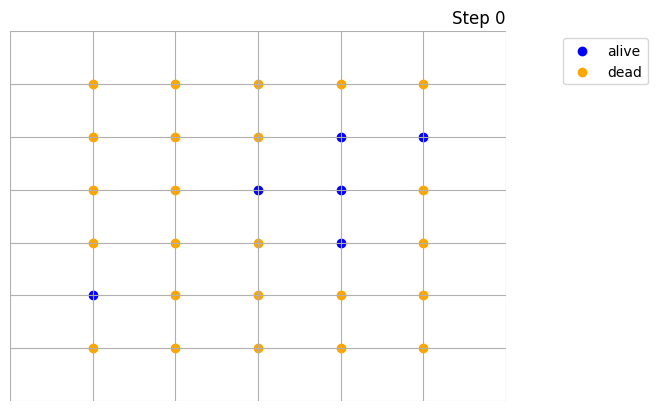

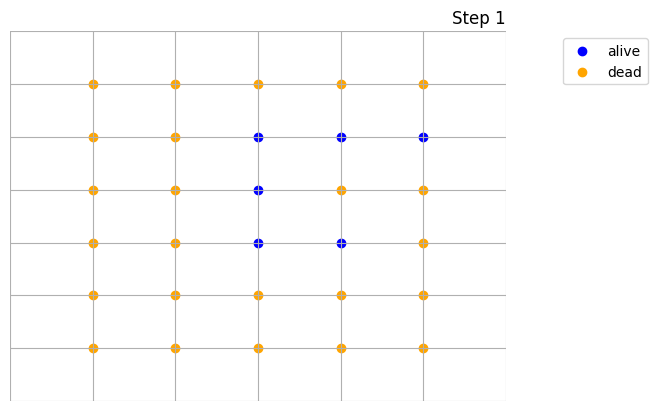

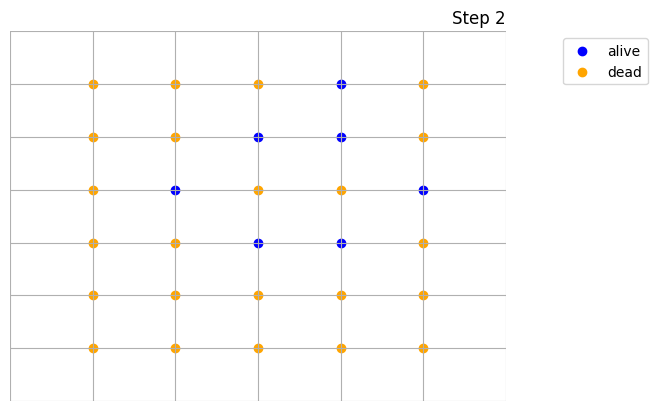

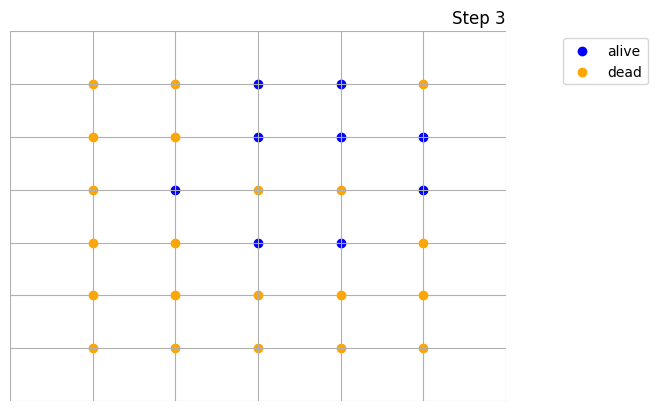

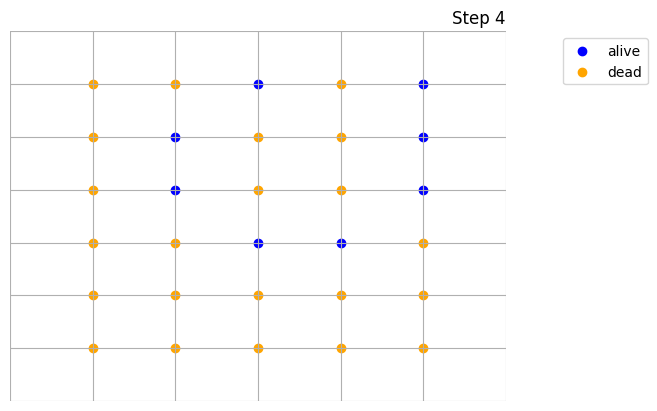

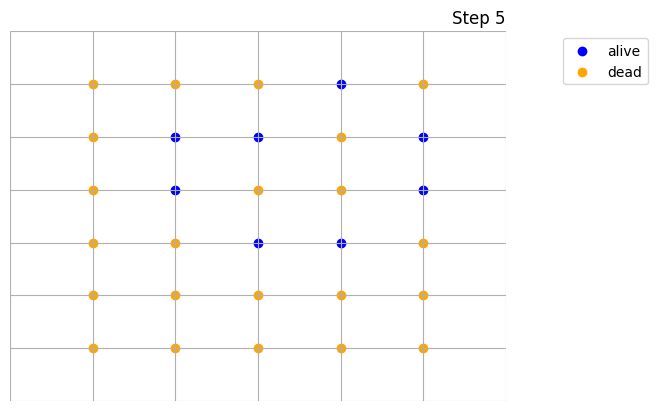

In [398]:
# We'll check that running multiple steps works as expected and matches the grid just above
game = GameOfLife(5, 6)
game.populate_grid([
    (2,3)
    , (1,0)
    , (3,3)
    , (3,2)
    , (4,4)
    , (4,3)
])
game.make_n_steps(5)

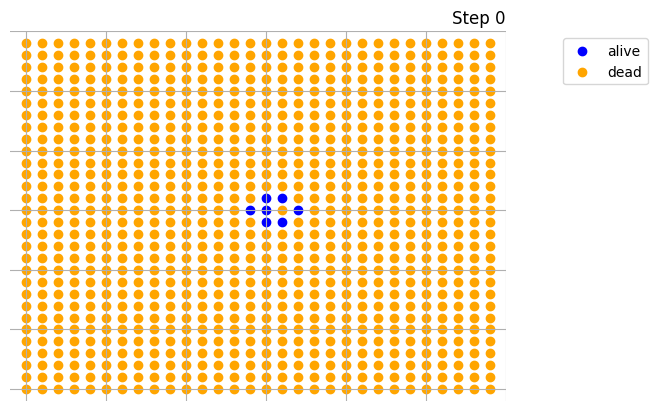

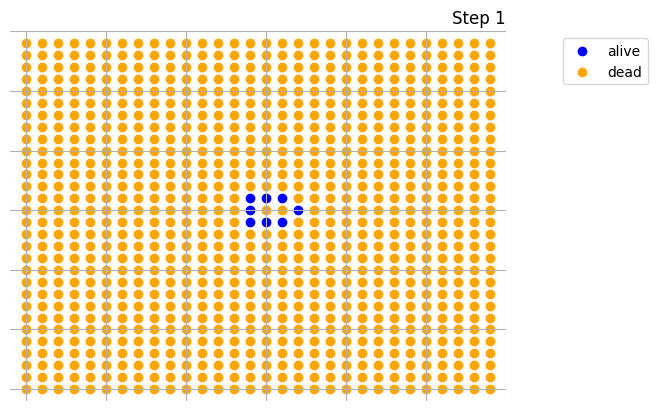

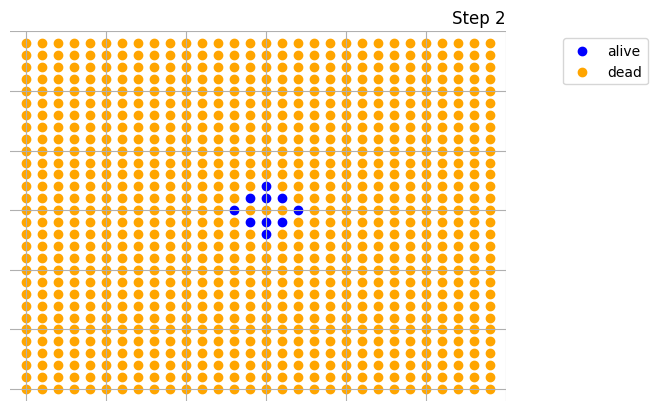

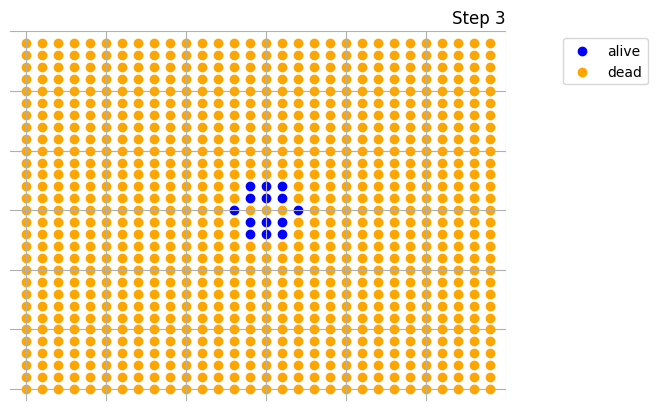

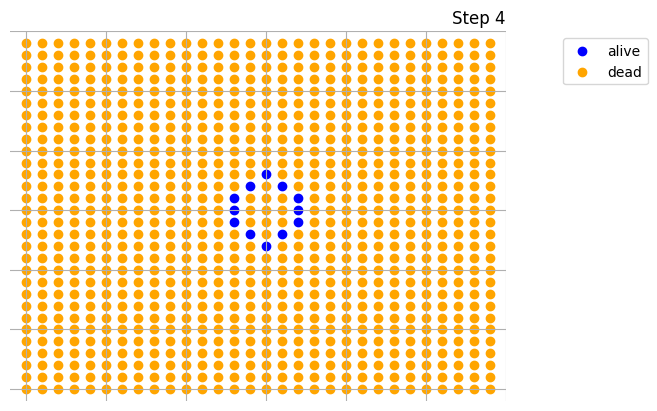

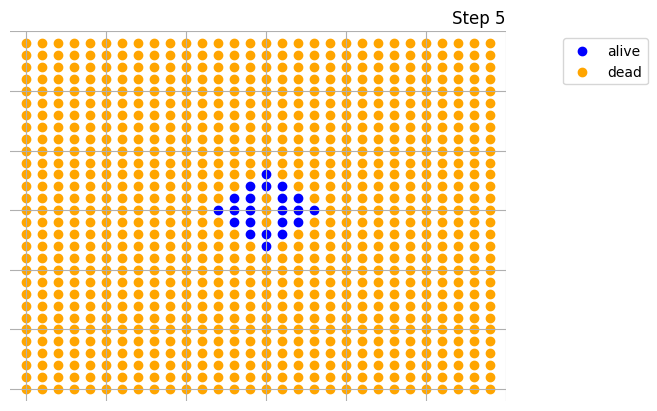

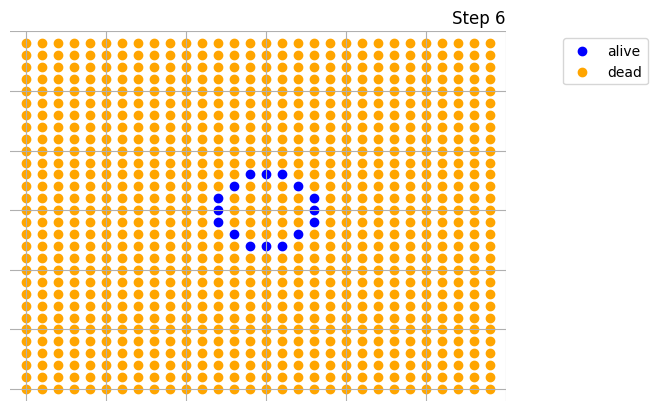

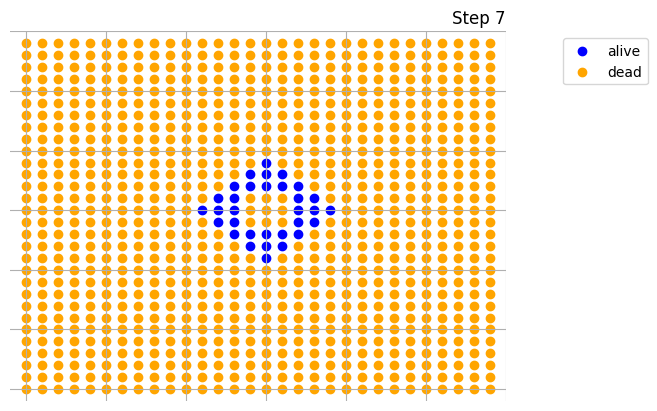

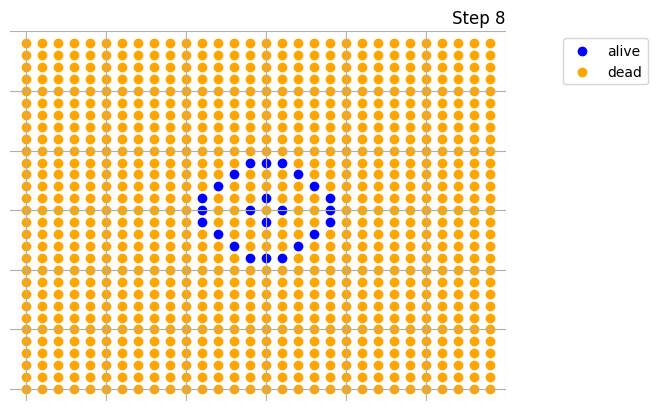

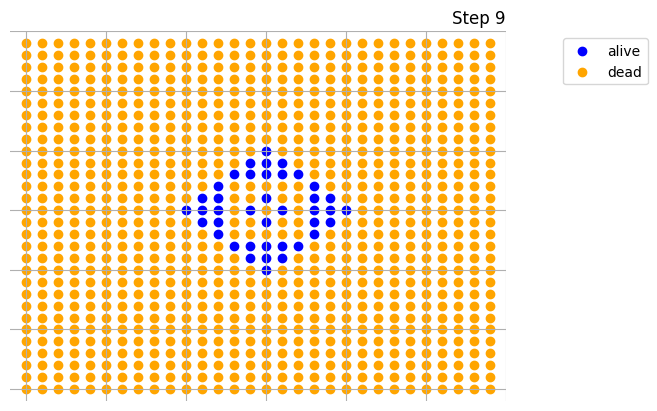

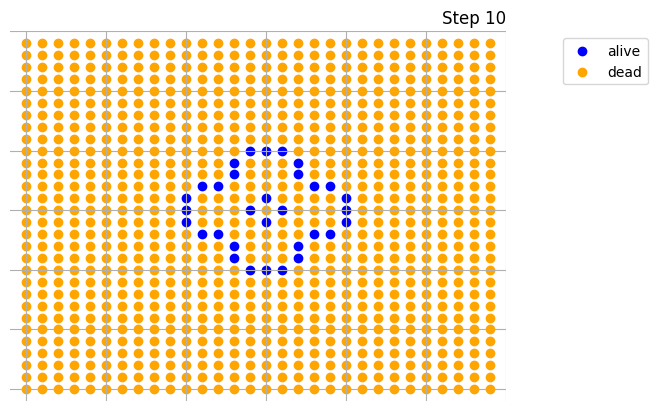

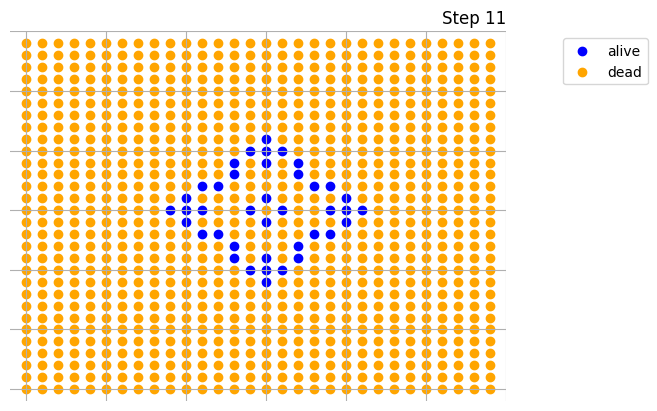

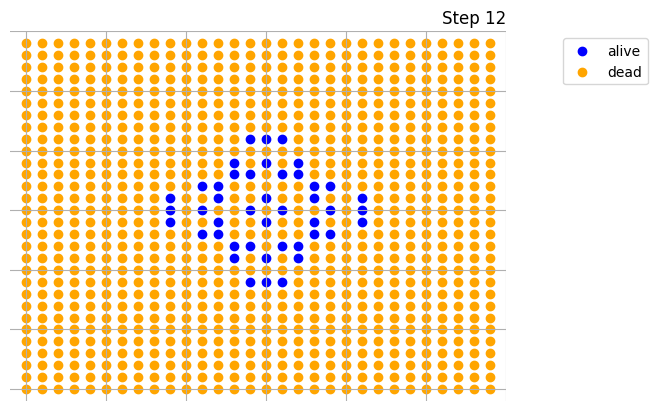

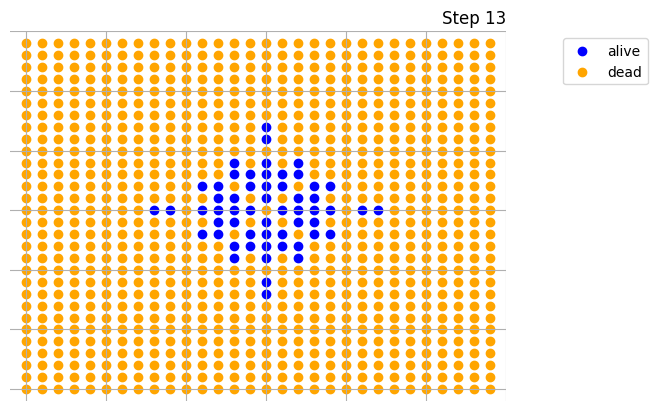

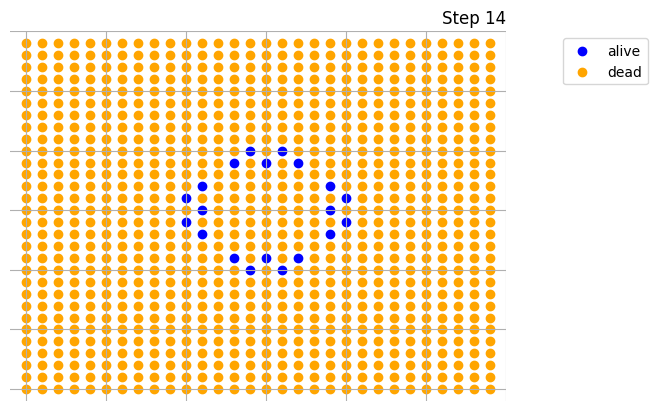

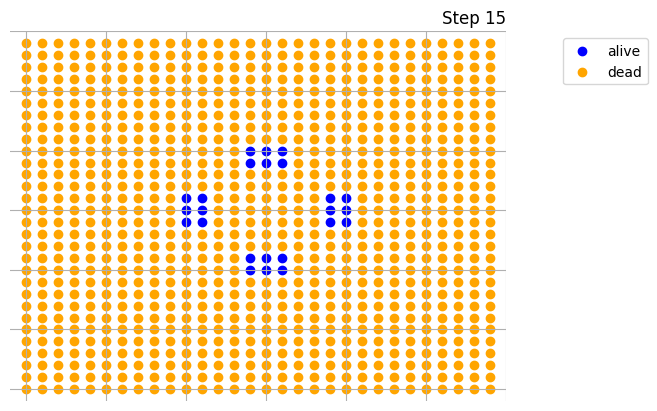

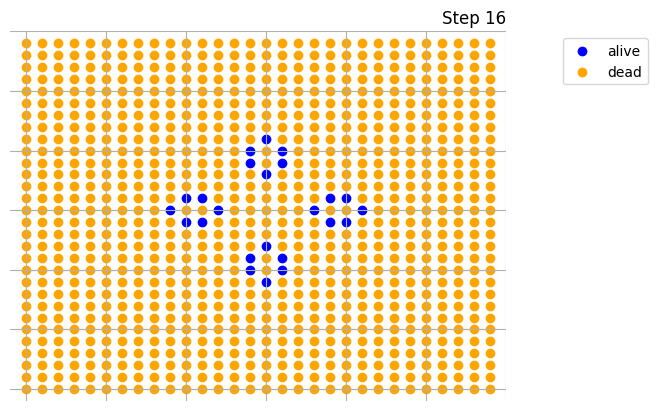

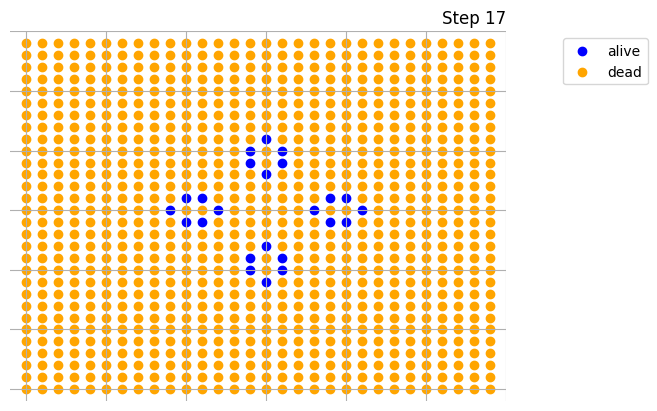

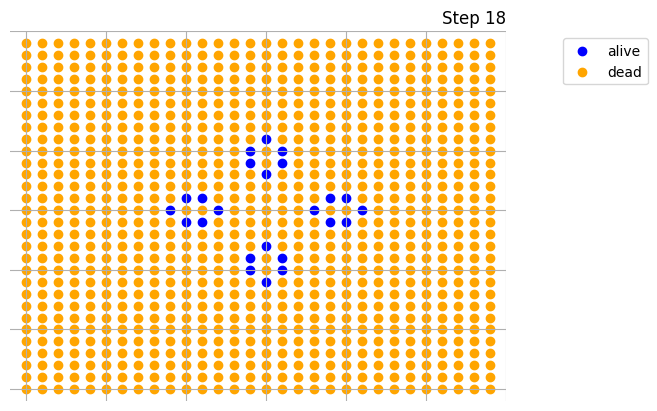

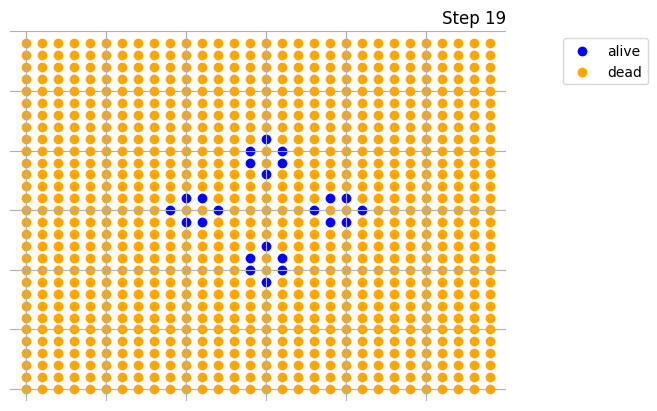

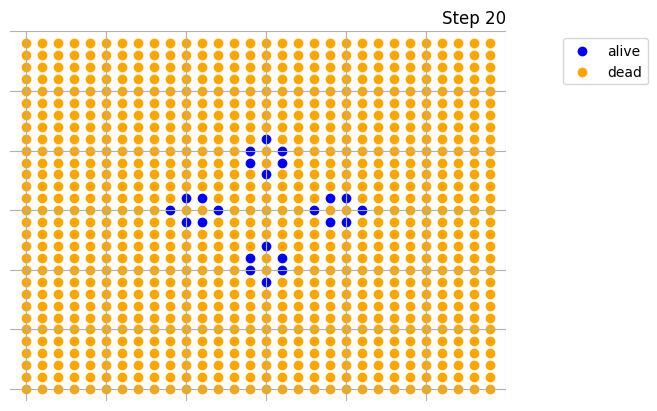

In [399]:
game_two = GameOfLife(30, 30)
game_two.populate_grid([(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)])
game_two.make_n_steps(20)

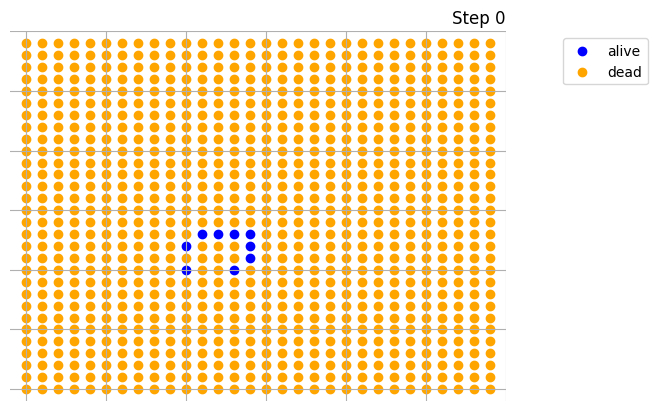

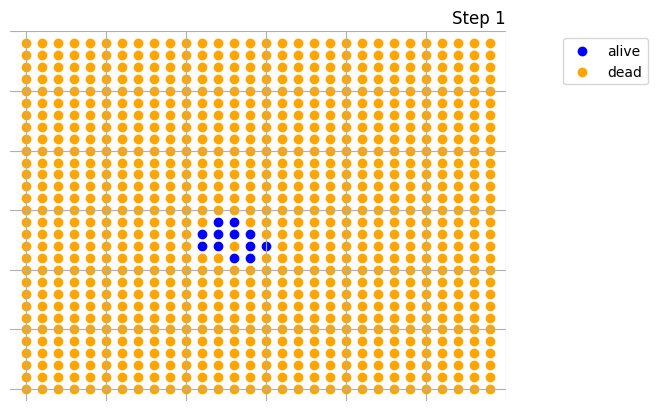

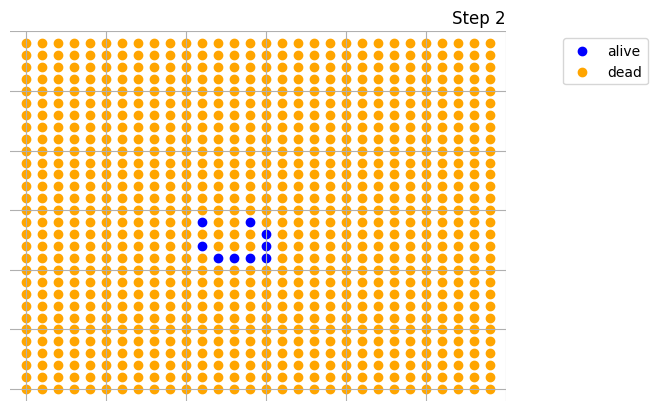

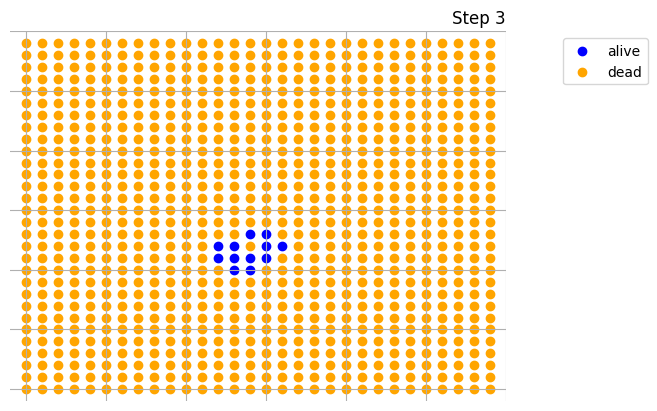

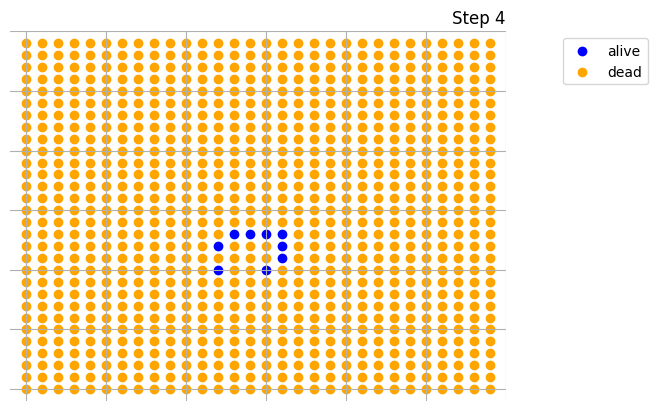

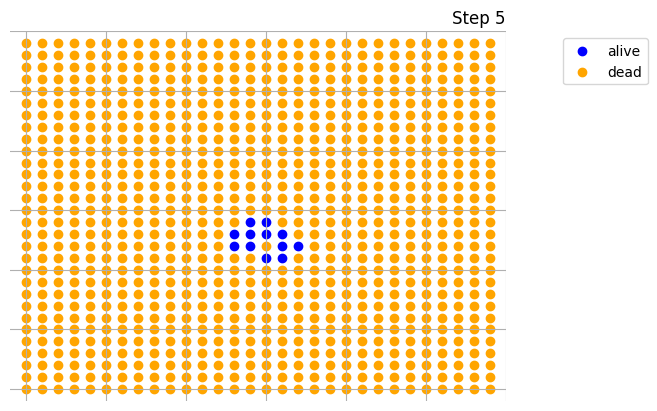

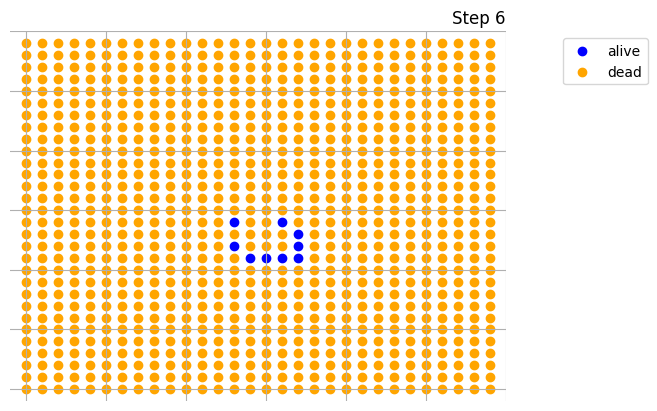

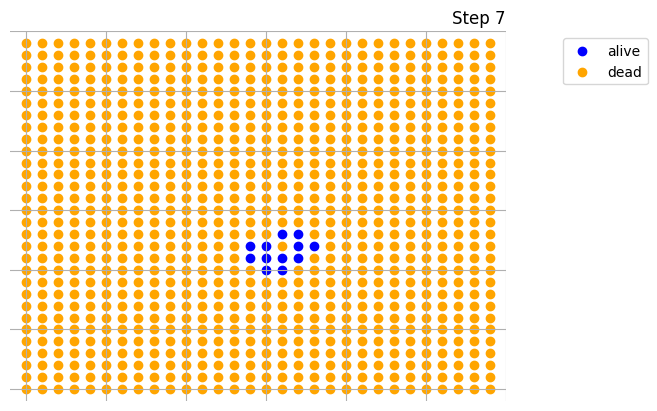

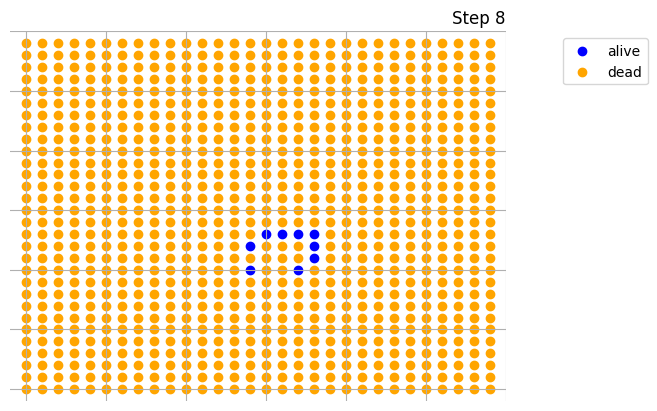

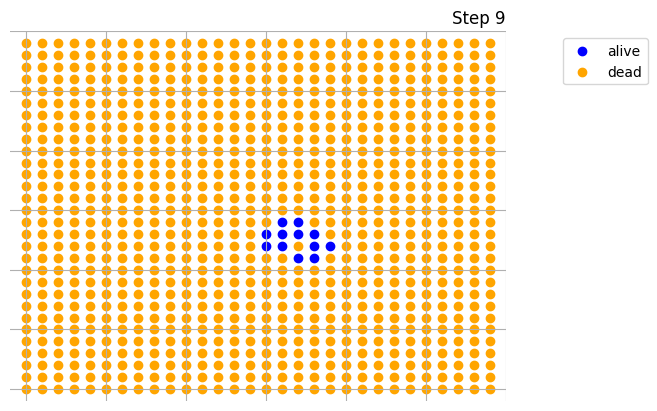

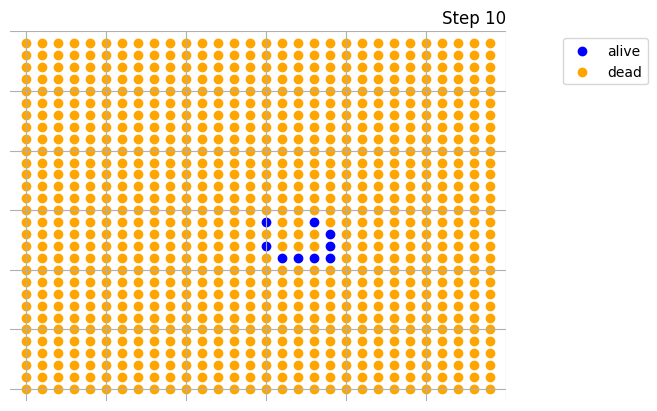

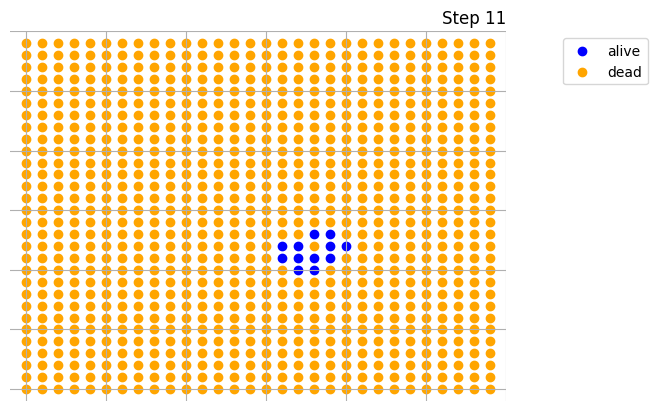

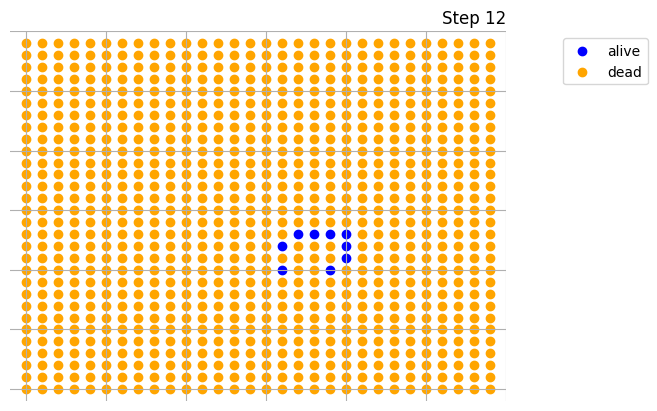

In [400]:
game_three = GameOfLife(30, 30)
game_three.populate_grid([(10, 10), (10, 13), (11, 14), (12, 10), (12, 14), (13, 11), (13, 12), (13, 13), (13, 14)])
game_three.make_n_steps(12)

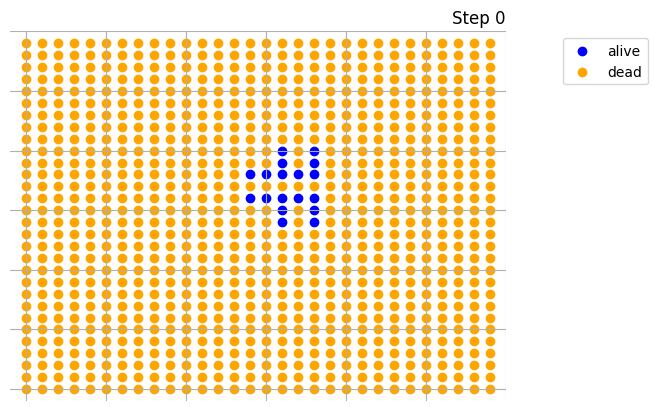

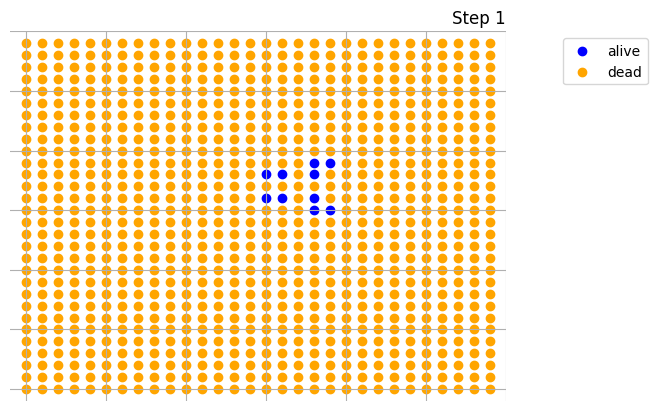

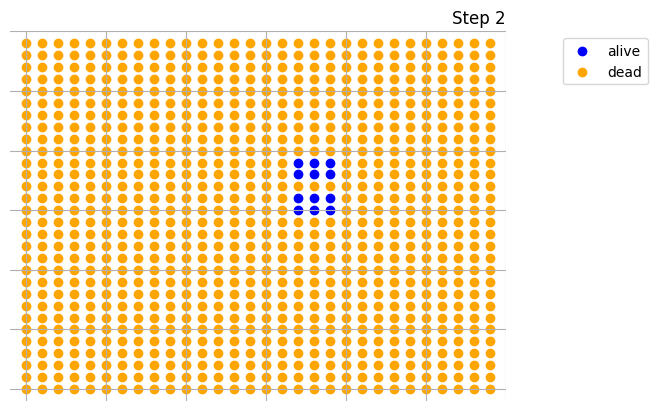

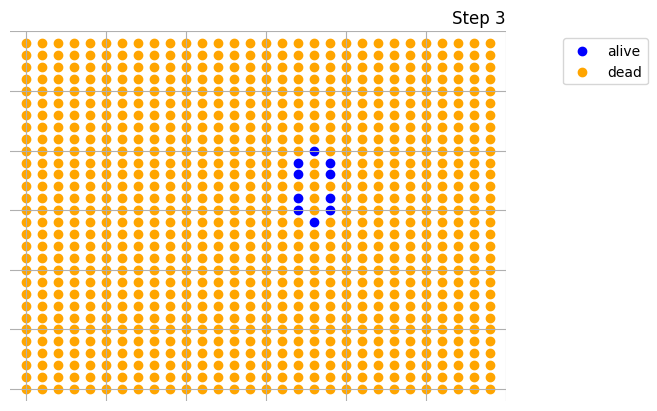

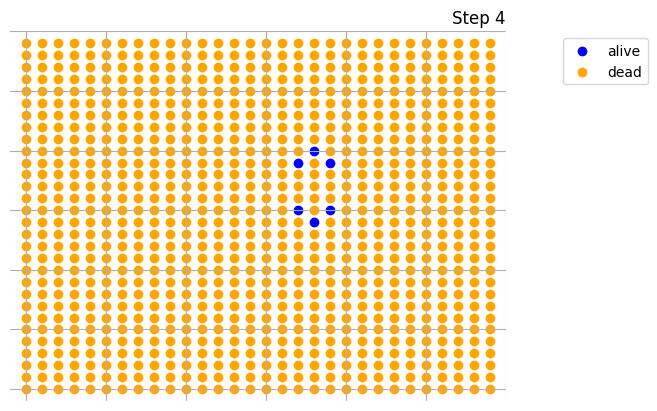

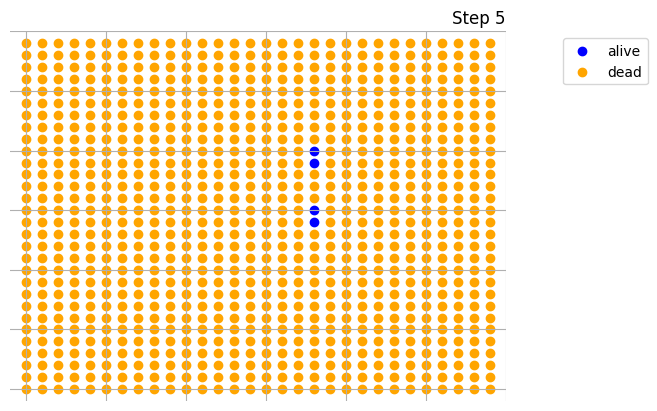

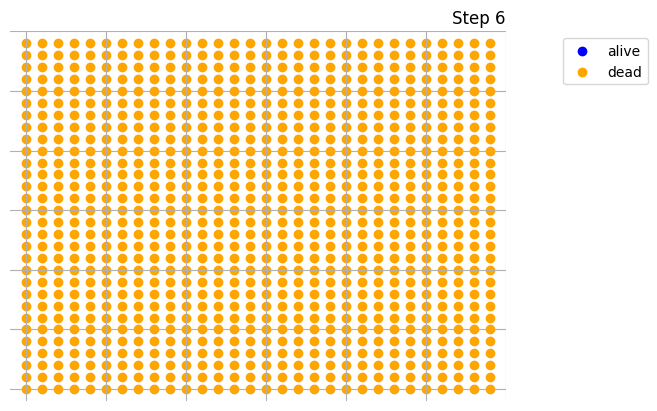

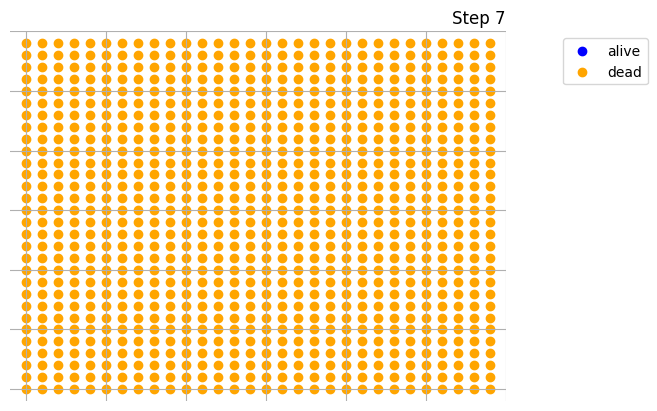

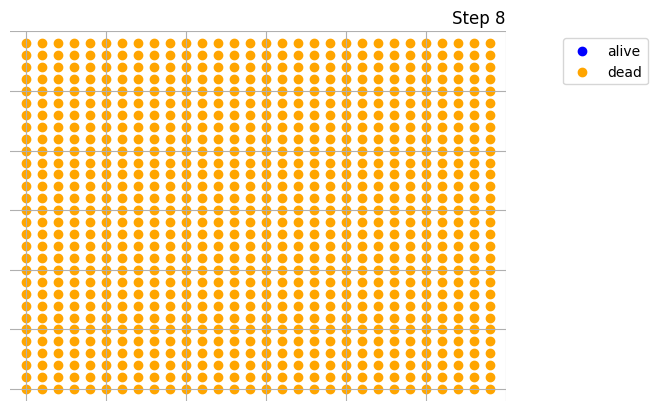

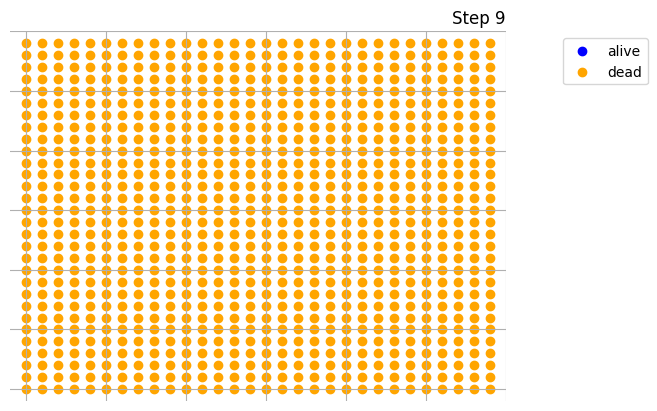

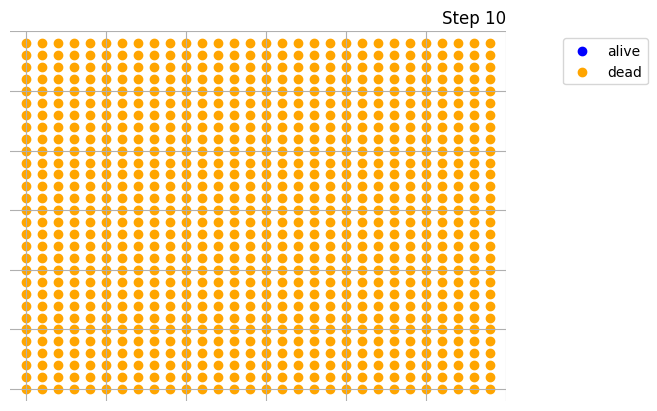

In [401]:
game_four = GameOfLife(30, 30)
game_four.populate_grid([
    (14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16),
    (16, 14), (16, 15), (16, 17), (16, 18),
    (18, 14), (18, 15), (18, 17), (18, 18),
    (14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)
])
game_four.make_n_steps(10)